## データの取り込み

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font="IPAexGothic", style="white")
pd.set_option('display.max_columns', 30)

In [2]:
#データの取り込み
df_train_master = pd.read_csv("bank_customer_churn_train.csv")
df_submit_master = pd.read_csv("bank_customer_churn_test.csv")
display(df_train_master.head())
display(df_submit_master.head())

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15671124,599,France,Male,25,6,120383.41,1,1,1,24903.09,0
1,15781553,760,Germany,Female,49,9,91502.99,1,1,0,117232.90,1
2,15589076,737,France,Male,36,9,0.00,1,0,1,188670.90,1
3,15791102,549,Germany,Male,41,9,95020.80,3,1,1,131710.59,1
4,15612207,840,Germany,Female,51,1,87779.83,1,0,1,36687.11,1


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15693382,828,France,Male,31,9,0.00,1,0,1,164257.37
1,15704014,738,Germany,Male,37,7,140950.92,2,1,0,195333.98
2,15751175,648,France,Female,44,2,0.00,2,1,1,58652.23
3,15586880,594,Germany,Male,41,2,122545.65,2,1,1,42050.24
4,15652808,774,France,Female,41,5,126670.37,1,1,0,102426.06


## データ探索(EDA)

In [3]:
#trainデータのサマリ
display(df_train_master.info())
display(df_train_master.describe())
display(df_train_master.describe(include="object"))

#データ数は8000
#欠損はなし
#describeにおかしな点は見当たらない

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       8000 non-null   int64  
 1   credit_score      8000 non-null   int64  
 2   country           8000 non-null   object 
 3   gender            8000 non-null   object 
 4   age               8000 non-null   int64  
 5   tenure            8000 non-null   int64  
 6   balance           8000 non-null   float64
 7   products_number   8000 non-null   int64  
 8   credit_card       8000 non-null   int64  
 9   active_member     8000 non-null   int64  
 10  estimated_salary  8000 non-null   float64
 11  churn             8000 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 750.1+ KB


None

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.569069e+07,650.554875,38.898250,5.016500,76957.235335,1.534625,0.705875,0.512750,100156.186889,0.205750
std,7.193617e+04,96.171762,10.500008,2.893272,62203.356671,0.584888,0.455677,0.499869,57558.097151,0.404274
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562814e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51116.080000,0.000000
50%,1.569045e+07,652.000000,37.000000,5.000000,97537.270000,1.000000,1.000000,1.000000,99921.245000,0.000000
75%,1.575291e+07,717.000000,44.000000,7.000000,127863.262500,2.000000,1.000000,1.000000,149472.020000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


,country,gender
count,8000,8000
unique,3,2
top,France,Male
freq,4000,4376


In [4]:
#submitデータのサマリ
display(df_submit_master.info())
display(df_submit_master.describe())
display(df_submit_master.describe(include="object"))

#churnがない点以外は、trainデータとほぼ同様

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       2000 non-null   int64  
 1   credit_score      2000 non-null   int64  
 2   country           2000 non-null   object 
 3   gender            2000 non-null   object 
 4   age               2000 non-null   int64  
 5   tenure            2000 non-null   int64  
 6   balance           2000 non-null   float64
 7   products_number   2000 non-null   int64  
 8   credit_card       2000 non-null   int64  
 9   active_member     2000 non-null   int64  
 10  estimated_salary  2000 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 172.0+ KB


None

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.569194e+07,650.424500,39.016000,4.998000,74600.505100,1.512500,0.704000,0.524500,99826.451850
std,7.194560e+04,98.580263,10.440941,2.888454,63148.150953,0.568336,0.456605,0.499524,57333.280401
min,1.556609e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,106.670000
25%,1.563164e+07,581.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,50619.692500
50%,1.569242e+07,652.000000,38.000000,5.000000,94767.635000,1.000000,1.000000,1.000000,100826.860000
75%,1.575428e+07,721.000000,44.000000,8.000000,126688.972500,2.000000,1.000000,1.000000,148537.370000
max,1.581536e+07,850.000000,88.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199929.170000


,country,gender
count,2000,2000
unique,3,2
top,France,Male
freq,1014,1081


churn
0    6354
1    1646
Name: customer_id, dtype: int64

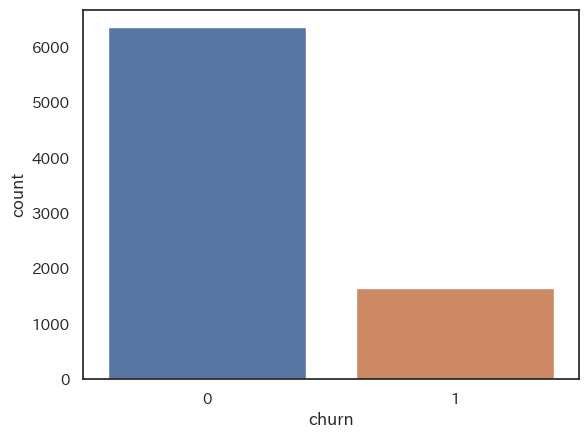

In [5]:
#churn
target = "churn"
sns.countplot(x=target, data=df_train_master)
df_train_master.groupby(target).count()["customer_id"]

#解約率は20.5%

In [6]:
df_train_master.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

churn credit_score                                                      \
               count        mean         std    min    25%    50%    75%   
0     0       6354.0  651.824992   95.059224  405.0  586.0  653.0  717.0   
1     1       1646.0  645.651883  100.229704  350.0  578.0  646.0  716.0   

          
     max  
0  850.0  
1  850.0

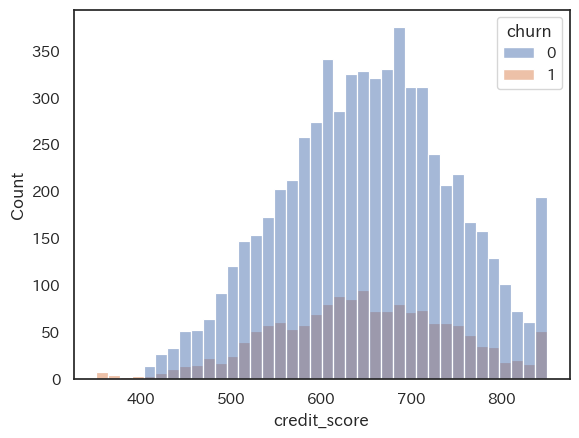

In [7]:
# credit_score
target="credit_score"
sns.histplot(x=target, hue="churn", data=df_train_master)
df_train_master.groupby("churn", as_index=False).describe()[["churn", target]]

#分布も平均値もほとんど差はない

,churn
country,
France,0.161500
Germany,0.328343
Spain,0.171343


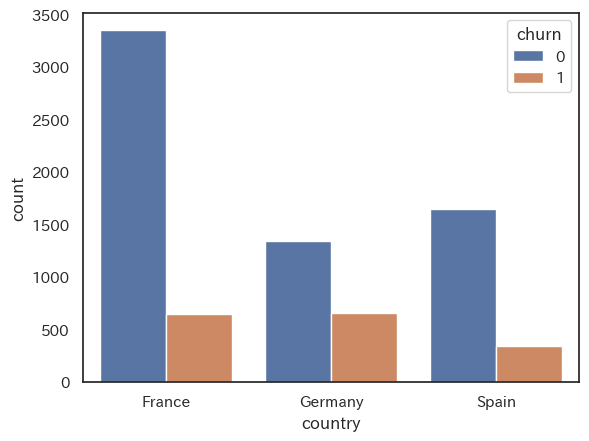

In [8]:
# country
target = "country"
sns.countplot(x=target, data=df_train_master, hue="churn")
df_train_master[["churn", target]].groupby(target).mean()

#Germanyの解約率が他の2倍近く高い
#Franceをベースにone-hot encoding

,churn
gender,
Female,0.253863
Male,0.165905


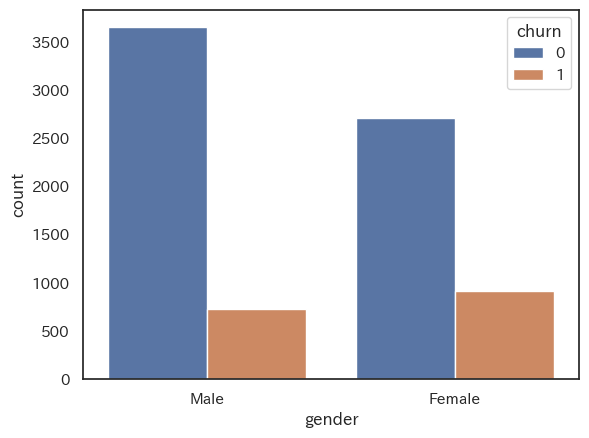

In [9]:
# gender
target = "gender"
sns.countplot(x=target, data=df_train_master, hue="churn")
df_train_master[["churn", target]].groupby(target).mean()

#Femaleの解約率が高め
#Maleを1, Femaleを0にdummy変換が必要

churn     age                                                    
          count       mean        std   min   25%   50%   75%   max
0     0  6354.0  37.349071  10.108990  18.0  31.0  36.0  41.0  92.0
1     1  1646.0  44.878493   9.817536  18.0  38.0  45.0  51.0  84.0

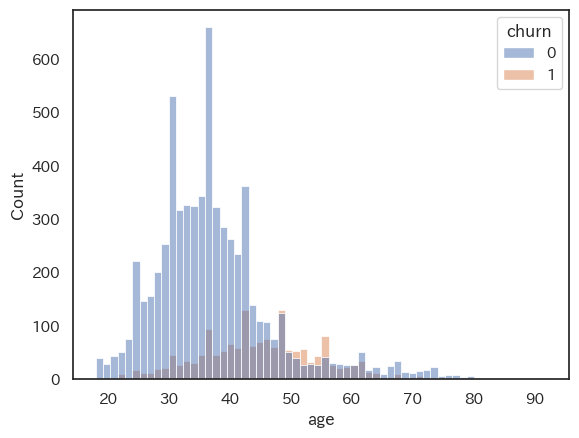

In [10]:
# age
target="age"
sns.histplot(x=target, hue="churn", data=df_train_master)
df_train_master.groupby("churn", as_index=False).describe()[["churn", target]]

#基本的に年齢が上がるほど解約率が高くなり、40後半~60までは特に解約率が高い
#年齢に加えて"45~60"かどうか判定する特徴量を加えてもよさそう

churn  tenure                                              
          count      mean       std  min  25%  50%  75%   max
0     0  6354.0  5.036355  2.885031  0.0  3.0  5.0  7.0  10.0
1     1  1646.0  4.939854  2.924485  0.0  2.0  5.0  7.0  10.0

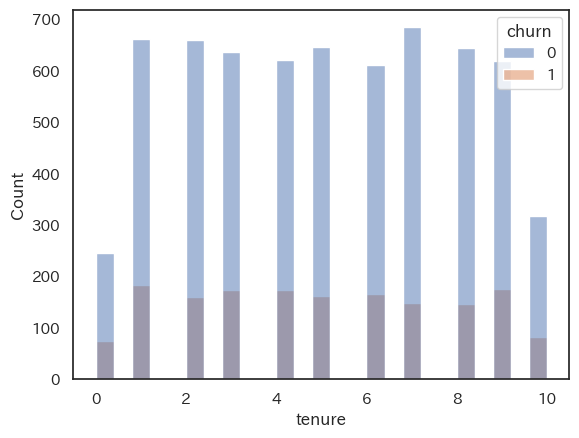

In [11]:
# tenure
target="tenure"
sns.histplot(x=target, hue="churn", data=df_train_master)
df_train_master.groupby("churn", as_index=False).describe()[["churn", target]]

#ほとんど差はない

churn balance                                                         \
          count          mean           std  min        25%        50%   
0     0  6354.0  73184.582307  62721.750908  0.0      0.000   92804.07   
1     1  1646.0  91520.684508  57916.363960  0.0  45911.625  109323.98   

                           
           75%        max  
0  126638.6650  212778.20  
1  131747.4625  250898.09

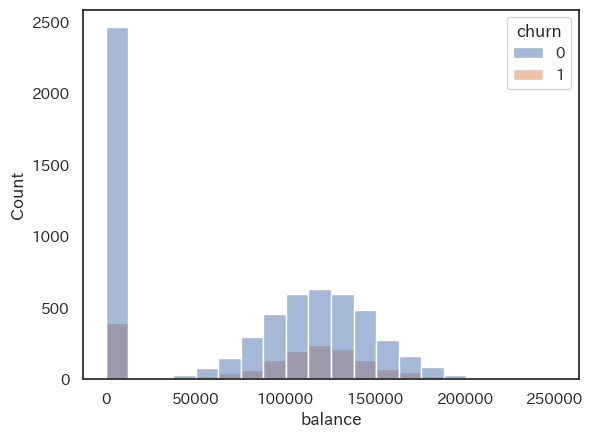

In [12]:
# balance
target="balance"
sns.histplot(x=target, hue="churn", data=df_train_master)
df_train_master.groupby("churn", as_index=False).describe()[["churn", target]]

#残高が0とそうじゃない人に二分している

In [13]:
#balance=0とそれ以外の解約率
print("baranceが0の解約率 :", df_train_master.query('balance==0')["churn"].mean())
print("balanceが0以上の解約率 :", df_train_master.query('balance!=0')["churn"].mean())

#balanceが0だと解約率が半分になる
#balanceが0かそうじゃないかのdummy変換をした方が良さそう

baranceが0の解約率 : 0.13820853743876838
balanceが0以上の解約率 : 0.24329054842473746


,churn
products_number,
1,0.276075
2,0.079598
3,0.834081
4,1.000000


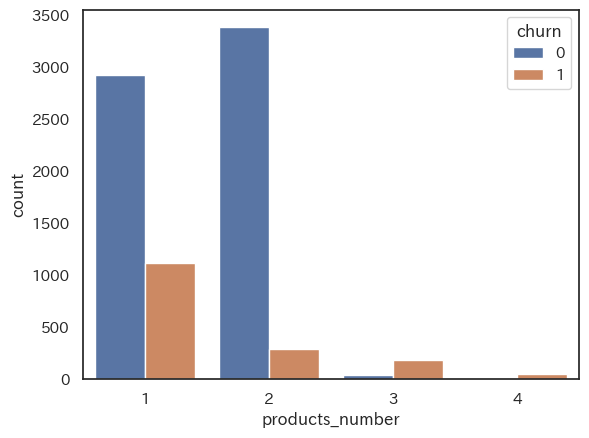

In [14]:
# products_number
target = "products_number"
sns.countplot(x=target, data=df_train_master, hue="churn")
df_train_master[["churn", target]].groupby(target).mean()

# 2が解約率低めだが、3,4になると逆に増えている
# カテゴリー変数として扱い、1をbaseに2,3以上をそれぞれone-hot encoding

,churn
credit_card,
0,0.206545
1,0.205419


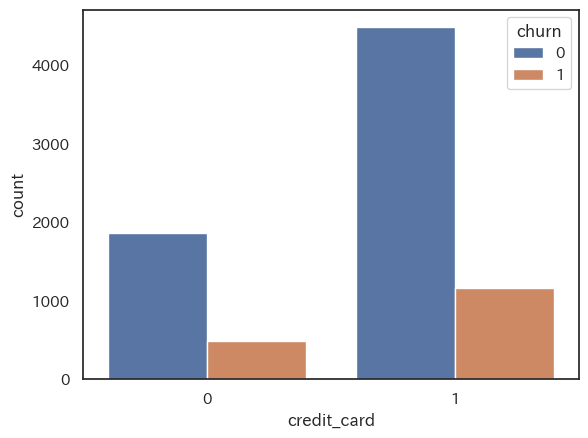

In [15]:
# credit_card
target = "credit_card"
sns.countplot(x=target, data=df_train_master, hue="churn")
df_train_master[["churn", target]].groupby(target).mean()

#差はない

,churn
active_member,
0,0.272447
1,0.142370


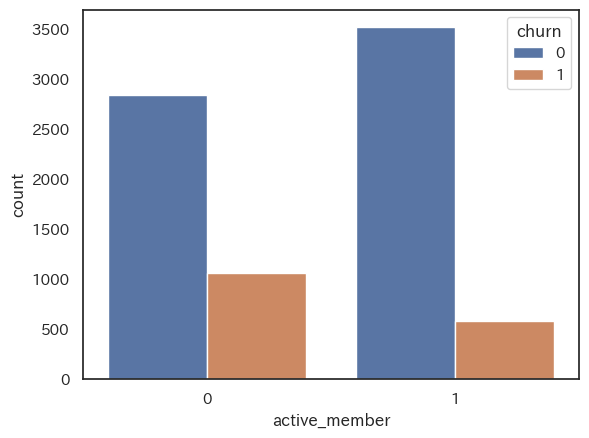

In [16]:
# active_member
target = "active_member"
sns.countplot(x=target, data=df_train_master, hue="churn")
df_train_master[["churn", target]].groupby(target).mean()

#activeな方が解約率は低い

churn estimated_salary                                                  \
                   count           mean           std    min         25%   
0     0           6354.0   99739.334226  57520.838747  90.07  50774.3400   
1     1           1646.0  101765.349599  57690.946244  11.58  52365.8825   

                                       
          50%          75%        max  
0   99117.550  148802.8825  199992.48  
1  103210.755  151993.1125  199808.10

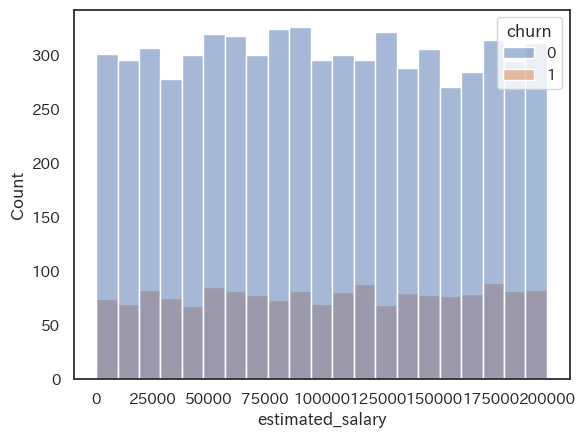

In [17]:
# estimated_salary
target="estimated_salary"
sns.histplot(x=target, hue="churn", data=df_train_master)
df_train_master.groupby("churn", as_index=False).describe()[["churn", target]]

#ほぼ差はない

## 前処理

In [18]:
#EDAの結果を元に、特徴量を適切な形に変換
df_train = df_train_master.copy()
df_submit = df_submit_master.copy()

#customer_idの削除
df_train = df_train.drop("customer_id", axis=1)
df_submit = df_submit.drop("customer_id", axis=1)

#country Franceをベースにone-hot encoding
df_train["country_Germany"] = df_train["country"].apply(lambda x:1 if x == "Germany" else 0)
df_train["country_Spain"] = df_train["country"].apply(lambda x:1 if x == "Spain" else 0)
df_train = df_train.drop("country", axis=1)
df_submit["country_Germany"] = df_submit["country"].apply(lambda x:1 if x == "Germany" else 0)
df_submit["country_Spain"] = df_submit["country"].apply(lambda x:1 if x == "Spain" else 0)
df_submit = df_submit.drop("country", axis=1)

#gender Maleを1, Femaleを0にdummy変換
df_train["gender"] = df_train["gender"].apply(lambda x:1 if x == "Male" else 0)
df_submit["gender"] = df_submit["gender"].apply(lambda x:1 if x == "Male" else 0)

#age "45~60"かどうか判定する特徴量を追加
df_train["age45-60"] = df_train["age"].apply(lambda x:1 if x>=45 and x<=60 else 0)
df_submit["age45-60"] = df_submit["age"].apply(lambda x:1 if x>=45 and x<=60 else 0)

#balance 0かそうじゃないかでdummy変換
df_train["balance"] = df_train["balance"].apply(lambda x:1 if x>0 else 0)
df_submit["balance"] = df_submit["balance"].apply(lambda x:1 if x>0 else 0)

#product_number 1をbaseに2,3以上をそれぞれone-hot encoding
df_train["products_number_2"] = df_train["products_number"].apply(lambda x:1 if x == 2 else 0)
df_train["products_number_over3"] = df_train["products_number"].apply(lambda x:1 if x > 2 else 0)
df_train = df_train.drop("products_number", axis=1)
df_submit["products_number_2"] = df_submit["products_number"].apply(lambda x:1 if x == 2 else 0)
df_submit["products_number_over3"] = df_submit["products_number"].apply(lambda x:1 if x > 2 else 0)
df_submit = df_submit.drop("products_number", axis=1)

display(df_train.info())
display(df_train.describe())
display(df_submit.info())
display(df_submit.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   credit_score           8000 non-null   int64  
 1   gender                 8000 non-null   int64  
 2   age                    8000 non-null   int64  
 3   tenure                 8000 non-null   int64  
 4   balance                8000 non-null   int64  
 5   credit_card            8000 non-null   int64  
 6   active_member          8000 non-null   int64  
 7   estimated_salary       8000 non-null   float64
 8   churn                  8000 non-null   int64  
 9   country_Germany        8000 non-null   int64  
 10  country_Spain          8000 non-null   int64  
 11  age45-60               8000 non-null   int64  
 12  products_number_2      8000 non-null   int64  
 13  products_number_over3  8000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 875.1 KB


None

,credit_score,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,age45-60,products_number_2,products_number_over3
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,650.554875,0.547000,38.898250,5.016500,0.642750,0.705875,0.512750,100156.186889,0.205750,0.250500,0.249500,0.187500,0.460125,0.034125
std,96.171762,0.497817,10.500008,2.893272,0.479219,0.455677,0.499869,57558.097151,0.404274,0.433328,0.432751,0.390337,0.498439,0.181562
min,350.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,0.000000,0.000000,51116.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,1.000000,1.000000,1.000000,99921.245000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,717.000000,1.000000,44.000000,7.000000,1.000000,1.000000,1.000000,149472.020000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,1.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   credit_score           2000 non-null   int64  
 1   gender                 2000 non-null   int64  
 2   age                    2000 non-null   int64  
 3   tenure                 2000 non-null   int64  
 4   balance                2000 non-null   int64  
 5   credit_card            2000 non-null   int64  
 6   active_member          2000 non-null   int64  
 7   estimated_salary       2000 non-null   float64
 8   country_Germany        2000 non-null   int64  
 9   country_Spain          2000 non-null   int64  
 10  age45-60               2000 non-null   int64  
 11  products_number_2      2000 non-null   int64  
 12  products_number_over3  2000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 203.3 KB


None

,credit_score,gender,age,tenure,balance,credit_card,active_member,estimated_salary,country_Germany,country_Spain,age45-60,products_number_2,products_number_over3
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000
mean,650.424500,0.540500,39.016000,4.998000,0.620500,0.704000,0.524500,99826.451850,0.252500,0.240500,0.18800,0.45450,0.026500
std,98.580263,0.498482,10.440941,2.888454,0.485384,0.456605,0.499524,57333.280401,0.434555,0.427494,0.39081,0.49805,0.160657
min,350.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,106.670000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,581.000000,0.000000,32.000000,2.000000,0.000000,0.000000,0.000000,50619.692500,0.000000,0.000000,0.00000,0.00000,0.000000
50%,652.000000,1.000000,38.000000,5.000000,1.000000,1.000000,1.000000,100826.860000,0.000000,0.000000,0.00000,0.00000,0.000000
75%,721.000000,1.000000,44.000000,8.000000,1.000000,1.000000,1.000000,148537.370000,1.000000,0.000000,0.00000,1.00000,0.000000
max,850.000000,1.000000,88.000000,10.000000,1.000000,1.000000,1.000000,199929.170000,1.000000,1.000000,1.00000,1.00000,1.000000


In [19]:
#説明変数と目的変数に分割
X = df_train.drop("churn", axis=1)
y = df_train["churn"]

#バリデーションデータを作成(hold-out)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#データを標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
df_submit = ss.transform(df_submit)

#確認
print(X_train.shape)
print(X_test.shape)
print(df_submit.shape)

(6400, 13)
(1600, 13)
(2000, 13)


## 予測と評価

In [20]:
# kerasによる深層学習モデル(全結合式NN)を作成
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential() #スタートはここから
model.add(Dense(64, activation = "relu", input_shape=(13,))) #1層目、ユニット数は2の倍数が慣例、小さい値から初めて層が深くなるごとに大きくしていくのが基本
model.add(Dropout(0.5)) #過学習予防 大体0.25や0.5で設定する場合が多い
model.add(Dense(128, activation = "relu")) #2層目、ここからDenseを繰り返すほど層が深くなるが、過学習しやすくなるため注意
model.add(Dropout(0.25))
model.add(Dense(1, activation = "sigmoid")) #出力層、2値予測の場合はユニット数1,sigmoidに

In [21]:
# 各種パラメータ設定

#学習のパラメータ(調整方法には汎用性の高いと言われるAdamを使用、学習率(lr)はデフォルトの0.001で大体OK)
optimizer = Adam(lr=0.001)
#アーリーストッピングの設定(5エポックの間精度が向上しなければ終了)
early_stopping = EarlyStopping(monitor="val_loss", patience=5)
#学習の周回数(なるべく大きくしておいて終了はアーリーストッピングに任せる)
epochs = 10000 
#バッチサイズ(2の倍数で調整するのが慣習、小さいほど学習に時間がかかるためデータ数に応じて調整)
batch_size = 64 

Epoch 1/10000
100/100 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.8075 - val_loss: 0.3867 - val_accuracy: 0.8269
Epoch 2/10000
100/100 [==============================] - 0s 595us/step - loss: 0.3811 - accuracy: 0.8434 - val_loss: 0.3835 - val_accuracy: 0.8338
Epoch 3/10000
100/100 [==============================] - 0s 596us/step - loss: 0.3771 - accuracy: 0.8462 - val_loss: 0.3816 - val_accuracy: 0.8331
Epoch 4/10000
100/100 [==============================] - 0s 593us/step - loss: 0.3714 - accuracy: 0.8503 - val_loss: 0.3788 - val_accuracy: 0.8356
Epoch 5/10000
100/100 [==============================] - 0s 588us/step - loss: 0.3716 - accuracy: 0.8495 - val_loss: 0.3777 - val_accuracy: 0.8356
Epoch 6/10000
100/100 [==============================] - 0s 584us/step - loss: 0.3644 - accuracy: 0.8531 - val_loss: 0.3752 - val_accuracy: 0.8400
Epoch 7/10000
100/100 [==============================] - 0s 586us/step - loss: 0.3643 - accuracy: 0.8561 - val_loss: 0.3

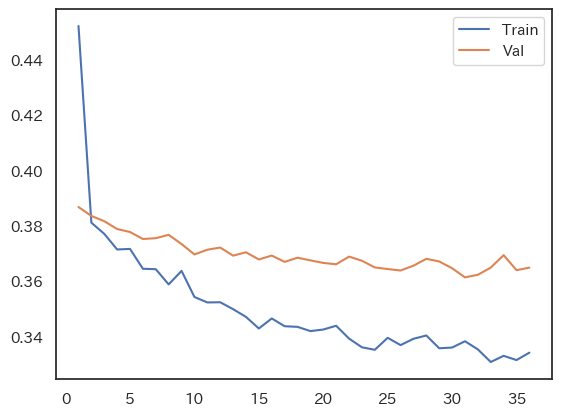

In [22]:
#モデル作成(ここは時間かかります)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train,
                    Y_train,
                    batch_size=batch_size,
                    epochs = epochs, 
                    validation_data = (X_test,Y_test),
                    callbacks=[early_stopping]
                    )

#学習過程をグラフ化
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, label="Train")
plt.plot(epochs, val_loss, label="Val")
plt.legend()

In [35]:
#作成したモデルでラベルを予測し、結果を混合行列で評価
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred>0.5, 1, 0)
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))

#acccuracy=0.85と高い(ベースラインモデルは約0.80)

50/50 [==============================] - 0s 293us/step
accuracy =  0.85
confusion matrix = 
 [[1210   39]
 [ 201  150]]


In [40]:
# サブミット用データの予測を実施し、提出用データを作成
results = model.predict(df_submit)
results = np.where(results>0.5, 1, 0)
df_submit_master["y"] = results
submit_data = df_submit_master[["customer_id", "y"]]
submit_data.to_csv("bank_customer_churn_submit.csv", index=False)
submit_data

#submit accuracy = 0.85

63/63 [==============================] - 0s 333us/step


,customer_id,y
0,15693382,0
1,15704014,0
2,15751175,0
3,15586880,0
4,15652808,0
...,...,...
1995,15567778,1
1996,15692132,0
1997,15682955,0
1998,15813168,1
